In [ ]:
# Make plots to visualize data collected by ChorusWaves search script
# Date created: not sure sorry :(
# Last modified: 7/13/2024
# Author: Max Feinland for Blum Research Group

In [ ]:
'''
Example event plots
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sampex
import matplotlib.dates as dates
from scipy.signal import find_peaks

def plot_date(t, ax, txt, b1, b2, thresh):
    cur_t = pd.to_datetime(t)
    h = sampex.HILT(cur_t)
    h.load()
    xlbel = "Time (UTC) on " + cur_t.strftime('%m/%d/%Y')
    
    m = np.where(h.times == cur_t)[0][0]
    d_plot = h.times[m-b1:m+b2]
    r_plot = h.counts[m-b1:m+b2]
    
    maxdis = max(r_plot) - min(r_plot)
    [pks, _] = find_peaks(r_plot, prominence=thresh*maxdis, distance=3)
    if txt == 'a)':
        pks = pks[0:4]
    
    txt_loc_x = h.times[m-b1]
    txt_loc_y = 0.8*(max(r_plot) - min(r_plot)) + min(r_plot)
    
    ax.plot(d_plot, r_plot)
    ax.plot(d_plot[pks], r_plot[pks], 'r*', markersize=10)
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M:%S')) 
    ax.set_xlabel(xlbel)
    ax.grid()
    ax.set_ylabel("Count rate (#/20ms)")
    ax.text(x=txt_loc_x, y=txt_loc_y, s=txt, fontsize=20)
    
data = pd.read_csv("all_events_v2.csv", index_col=0)
good_data = data[data.final_eye<2]
good_data = good_data.reset_index(drop=True)

fig, ax = plt.subplots(4,2, figsize=(15,12), constrained_layout=True)
plot_date(good_data.t[15], ax[0,0], 'a)', 25, 140, 0.3)
plot_date(good_data.t[25], ax[0,1], 'b)', 25, 140, 0.25)
plot_date(good_data.t[10], ax[1,0], 'c)', 40, 150, 0.25)
plot_date(good_data.t[12], ax[1,1], 'd)', 25, 100, 0.35)
plot_date(good_data.t[11], ax[2,0], 'e)', 20, 90, 0.2)
plot_date(good_data.t[35], ax[2,1], 'f)', 25, 100, 0.2)
plot_date(good_data.t[33], ax[3,0], 'g)', 50, 120, 0.35)
plot_date(good_data.t[64], ax[3,1], 'h)', 50, 140, 0.2)


<ipython-input-74-8634301092b0>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


UnboundLocalError: local variable 'nm' referenced before assignment

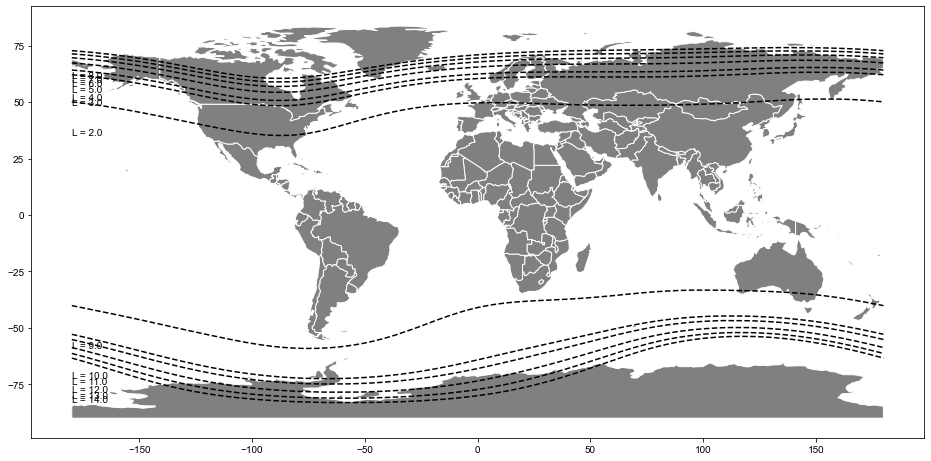

In [74]:
'''
Geographical location
'''

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import ast

data = pd.read_csv("all_events_v2.csv", index_col=0)
good_data = data[data.final_eye<1.5]

lgrid = pd.read_csv('Lgrid.dat', delimiter='\t', header=None)
        
        
'''Make world and also L-shell contours'''
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(16, 9))
world.plot(ax=ax, color='gray', edgecolor='white')

def name_line(col_num):
    if col_num < 15:
        nm = "L = " + str(int(col_num))
    elif col_num == 30:
        nm = "Magnetic Equator"
    return nm

for i in np.arange(1, 30, 2):
    min_pos = np.argmin(lgrid.iloc[:,i])
    lat = np.concatenate(([lgrid.iloc[min_pos:,i-1], lgrid.iloc[:min_pos,i-1]]))
    lon = np.concatenate(([lgrid.iloc[min_pos:,i], lgrid.iloc[:min_pos,i]]))
    if i < 15:
        col_idx = int((i - 1)/2)
        ln_name = name_line((i+3)/2)
    elif (i >= 15) & (i < 28):
        col_idx = int((i - 15)/2)
        ln_name = name_line((i+3)/2)
    else:
        col_idx = len(col_list)-1
        ln_name = "Magnetic Equator"
    ax.plot(lon, lat, 'k--', label=ln_name, zorder=5)
    ax.text(min(lon), min(lat), ln_name)
fleg = ax.legend(loc="center left")
ax.add_artist(fleg)
'''End world & L-shell contours'''
# def plot_specific_shape(ok_shapes, ax, data, spread, err_mat):
#     if type(ok_shapes) == str:
#         indices = np.where(data.shapes==ok_shapes)[0]
#     elif type(ok_shapes) == list:
#         indices = data.index[(data['shapes'].isin(ok_shapes)) & (data.spread < 0.15)] 
#     else:
#         print("wtf did you just pass me?")
# Plot each shape type
decr = ax.scatter(good_data.lon[good_data.shapes=="decr"], good_data.lat[good_data.shapes=="decr"], 
                  s=100,  c='blue', label='decreasing', zorder=50, edgecolor='black')
blake = ax.scatter(good_data.lon[good_data.shapes=="blake"], good_data.lat[good_data.shapes=="blake"],
                   s=100, c='green',  label='blake', zorder=50, edgecolor='black')
crown = ax.scatter(good_data.lon[good_data.shapes=="crown"], good_data.lat[good_data.shapes=="crown"],
                   s=100, c='red', label='crown', zorder=50, edgecolor='black')
flat = ax.scatter(good_data.lon[good_data.shapes=="flat"], good_data.lat[good_data.shapes=="flat"],
                   s=100, c='yellow', label='flat', zorder=50, edgecolor='black')
incr = ax.scatter(good_data.lon[good_data.shapes=="incr"], good_data.lat[good_data.shapes=="incr"],
                   s=100, c='cyan', label='increasing', zorder=50, edgecolor='black')
smile = ax.scatter(good_data.lon[good_data.shapes=="smile"], good_data.lat[good_data.shapes=="smile"],
                   s=100, c='magenta', label='smile', zorder=50, edgecolor='black')
half = ax.scatter(good_data.lon[good_data.shapes=="half"], good_data.lat[good_data.shapes=="half"],
                   s=100, c='orange', label='half', zorder=50, edgecolor='black')

ax.legend(handles=[decr, blake, crown, flat, incr, smile, half], loc='right')

plt.xlabel("Longitude", color="white")
plt.ylabel("Latitude", color="white")
plt.xticks(color='white')
plt.yticks(color='white')


<ipython-input-73-01f3aa196db9>:113: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


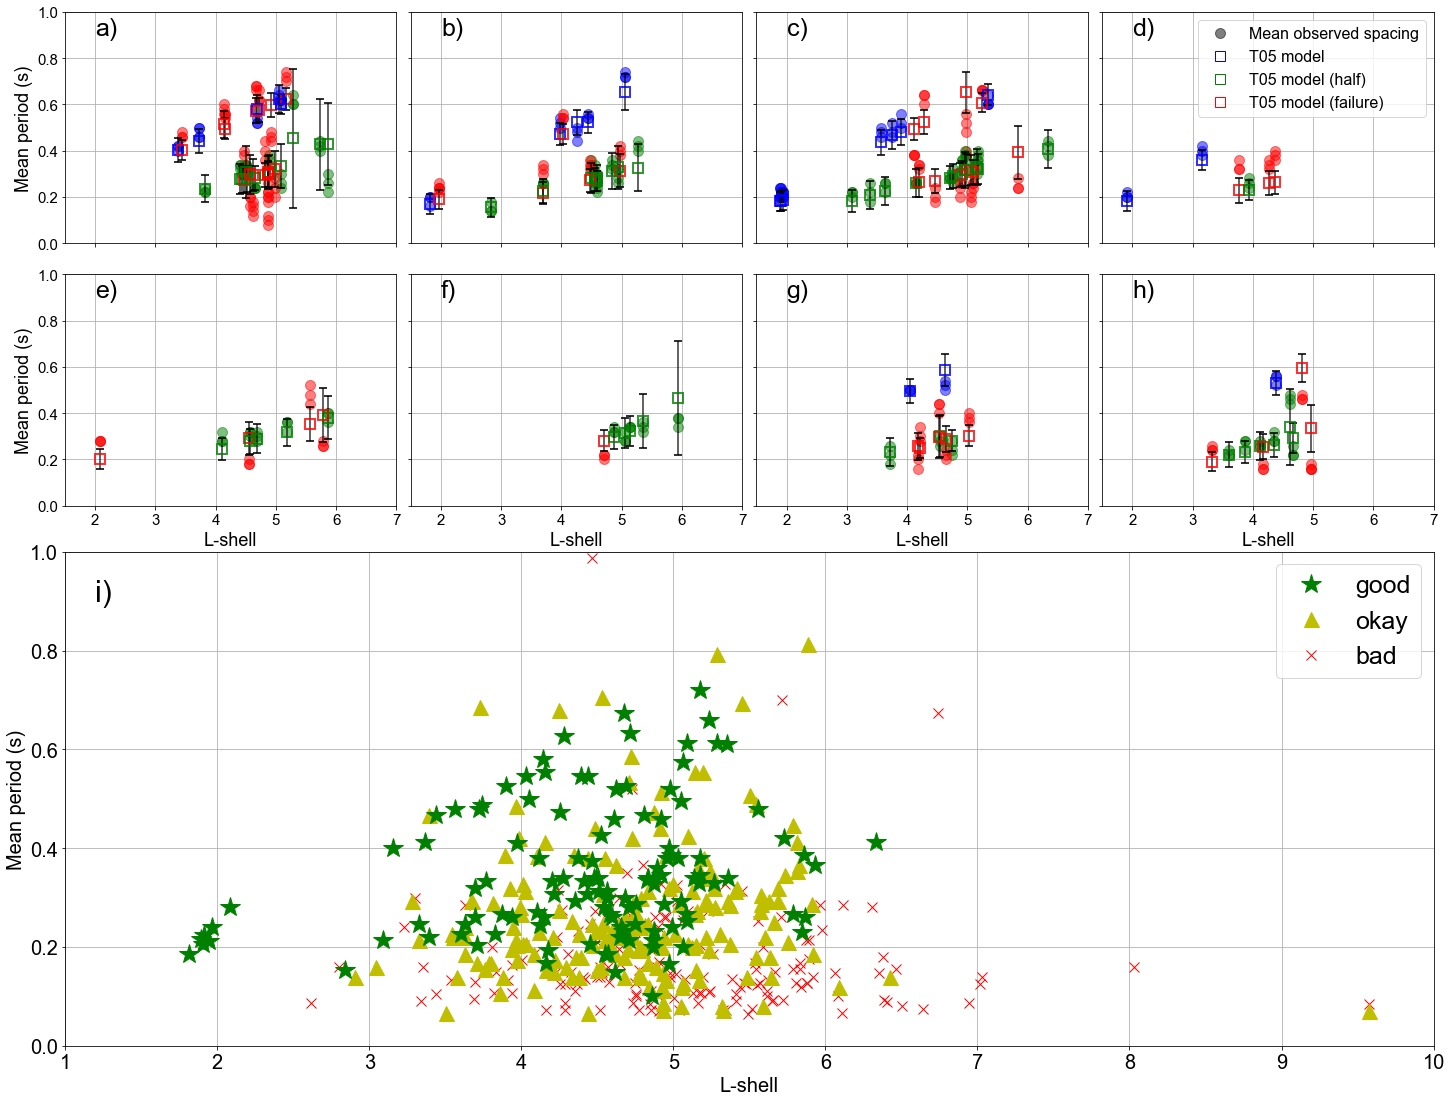

In [73]:
'''
Period vs. L-shell
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import ast
from sklearn.linear_model import QuantileRegressor

plt.rcParams["font.family"] = "Arial"

def plot_specific_shape(ok_shapes, ax, spread, data, s, txt):
    # find indices containing allowable shapes
    # determine if one or multiple shapes passed in
    if type(ok_shapes) == str:
        indices = np.where(data.shapes==ok_shapes)[0]
    elif type(ok_shapes) == list:
        indices = data.index[data['shapes'].isin(ok_shapes)] 
    else:
        print("Error")

    fullper = np.zeros(len(data)) # initialize vector containing full/half classification
    
    for j in indices:
        err = np.sqrt(spread.iloc[j,0]**2 + 0.04**2) # propagate error
        if (abs(data.newper[j] - data.tb[j]) <= err) & \
        (abs(data.newper[j] - data.tb[j]/2) <= err):
            # Both conditions are true, so figure out which is closer
            if abs(data.newper[j] - data.tb[j]) <= abs(data.newper[j] - data.tb[j])/2:
                fullper[j] = 1
                edgecol = 'blue'
                tb = data.tb[j]
            else:
                fullper[j] = 2
                edgecol = 'green'
                tb = good_data.tb[j]/2
        elif abs(data.newper[j] - data.tb[j]) <= err:
            fullper[j] = 1
            edgecol = 'blue'
            tb = good_data.tb[j]
        elif abs(data.newper[j] - data.tb[j]/2) <= err:
            fullper[j] = 2
            edgecol = 'green'
            tb = data.tb[j]/2
        else:
            fullper[j] = 0
            edgecol = 'red'
            if abs(data.newper[j] - data.tb[j]) < abs(data.newper[j] - data.tb[j]/2):
                tb = data.tb[j]
            else:
                tb = data.tb[j]/2
        ax.plot(data.L[j]*np.ones(len(s.dt[j])), s.dt[j], 'o', color=edgecol, 
                alpha = 0.5, markersize=10, zorder=10)
        ax.errorbar(data.L[j], tb, yerr=err, fmt='s', 
                 markerfacecolor='none', capsize=4, markeredgecolor=edgecol,
                 zorder=30, markersize=10, color='black', markeredgewidth=2, alpha=0.8)
    
    ax.text(2, 0.9, txt, fontsize=25)
    
    ax.grid()
    if txt in ['e)', 'f)', 'g)', 'h)']:
        ax.set_xlabel("L-shell", fontsize=18)
    if txt == 'a)' or txt == 'e)':
        ax.set_ylabel("Mean period (s)", fontsize=18)
    ax.set_ylim(0, 1)
    ax.set_xlim(1.5, 7)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)

# Import data
data = pd.read_csv("all_events_v2.csv", index_col=0)
good_data = data[data.final_eye<2] # restrict to good events
good_data = good_data.reset_index(drop=True) # reset index


# spread in model predictions
pers = pd.read_csv("model_pers.csv",index_col=0)
tb05 = pd.DataFrame({'tb05': good_data.tb})
pers = pers.join(tb05)
spread = pd.DataFrame({'spread': (pers.max(axis=1) - pers.min(axis=1))})
good_data = good_data.join(spread)

s = pd.read_csv("spacings.csv")
s['dt'] = s['dt'].apply(ast.literal_eval)
newper = [np.mean(x) for x in s.dt]
newp = pd.DataFrame({'newper': newper})
good_data = good_data.join(newp)

# Making figures
fig = plt.figure(layout='constrained', figsize=(20,15))
subfigs = fig.subfigures(2, 1, wspace=0.07)
ax = subfigs[0].subplots(2, 4, sharex=True, sharey=True)

# Calling first subfigure
plot_specific_shape('decr', ax[0,0], spread, good_data, s, 'a)')
plot_specific_shape('blake', ax[0,1], spread, good_data, s, 'b)')
plot_specific_shape('crown', ax[0,2], spread, good_data, s, 'c)')
plot_specific_shape('flat', ax[0,3], spread, good_data, s, 'd)')

plot_specific_shape('incr', ax[1,0], spread, good_data, s, 'e)')
plot_specific_shape('half', ax[1,1], spread, good_data, s, 'f)')
plot_specific_shape('smile', ax[1,2], spread, good_data, s, 'g)')
plot_specific_shape('other', ax[1,3], spread, good_data, s, 'h)')

# put stuff on the last subplot
ax[0,3].plot(0, 0, 'ko', alpha=0.5, markersize=10, label='Mean observed spacing')
ax[0,3].plot(0, 0, 'bs', markerfacecolor='none', markersize=10, label='T05 model')
ax[0,3].plot(0, 0, 'gs', markerfacecolor='none', markersize=10, label='T05 model (half)')
ax[0,3].plot(0, 0, 'rs', markerfacecolor='none', markersize=10, label='T05 model (failure)')
ax[0,3].legend(fontsize=16)
fig.tight_layout()

# Second subfigure
ax1 = subfigs[1].subplots()
ax1.plot(data.L[data.final_eye<2], data.per[data.final_eye<2], 'g*', label="good", markersize=20, 
        zorder=50)
ax1.plot(data.L[(data.final_eye<3) & (data.final_eye>1.5)], 
        data.per[(data.final_eye<3) & (data.final_eye>1.5)], 'y^', label="okay", markersize=15,
        zorder=25)
ax1.plot(data.L[data.final_eye==3], data.per[data.final_eye==3], 'rx', label="bad", markersize=10,
        zorder=10)
ax1.text(1.2, 0.9, 'i)', fontsize=30)
ax1.grid()
ax1.legend(fontsize=25)
ax1.set_xlabel("L-shell", fontsize=20)
ax1.set_ylabel("Mean period (s)", fontsize=20)
ax1.set_xlim(1, 10)
ax1.set_ylim(0, 1)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

In [ ]:
'''
Histograms
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# read in data
data = pd.read_csv("all_events_v2.csv")
ref = pd.read_csv("microburst_catalog_00.txt", sep=",")

# limit reference data to time surveyed by my search script
time_needed = pd.to_datetime(ref['dateTime'])
idx = np.where((time_needed >= datetime(2000, 1, 1)) & (time_needed <= datetime(2003, 12, 31)))[0]
ref = ref.iloc[idx,:]

# plot in MLT
fig, ax1 = plt.subplots(3, 1, figsize=(10,15))
ax2 = ax1[0].twinx() 
ax2.hist(ref.MLT, bins=24, range=(0,24), label='all microbursts', alpha=0.3, 
         facecolor='red', edgecolor='red', zorder=20)
ax1[0].hist(data.MLT[final_eye == 1], bins=24, range=(0,24), label='good bouncing packets', alpha=0.5, 
         facecolor='black', edgecolor='black', zorder=50)

ax2.tick_params(axis='y', labelcolor="lightcoral")
ax2.set_xlabel('MLT', color="white")
ax2.set_ylabel('Counts (#), all microbursts', color="lightcoral")
ax1[0].set_ylabel('Counts (#), good bouncing packets')
ax1[0].grid()
ax2.tick_params(labelcolor="lightcoral")
ax1[0].text(0, 9, "a)", fontsize=20)

### L-shell
ax3 = ax1[1].twinx() 
ax3.hist(ref.L_Shell, bins=14, range=(1,8), label='all microbursts', alpha=0.3, 
         facecolor='red', edgecolor='red', zorder=20)
ax1[1].hist(data.L[final_eye == 1], bins=14, range=(1,8), label='good bouncing packets', 
            alpha=0.5, facecolor='black', edgecolor='black', zorder=50)

ax3.tick_params(axis='y', labelcolor="lightcoral")
ax3.set_xlabel('L-shell')
ax3.set_ylabel('Counts (#), all microbursts', color="lightcoral")
ax1[1].set_ylabel('Counts (#), good bouncing packets')
ax1[1].grid()
ax3.tick_params(labelcolor="lightcoral")
ax1[1].text(1, 14.5, "b)", fontsize=20)

ax1[2].plot
